In [13]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/content/train.csv',index_col='ID')
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [6]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [8]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
list_cat = ['Ever_Married','Graduated','Profession','Var_1']
list_num = ['Work_Experience','Family_Size']

for i in list_cat:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
for i in list_num:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [12]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [14]:
le=LabelEncoder()
list=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation']
for i in list:
    df[i]=le.fit_transform(df[i])

In [15]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.0,2,4.0,3,3
462643,0,1,38,1,2,1.0,0,3.0,3,0
466315,0,1,67,1,2,1.0,2,1.0,5,1
461735,1,1,67,1,7,0.0,1,2.0,5,1
462669,0,1,40,1,3,1.0,1,6.0,5,0


<Axes: >

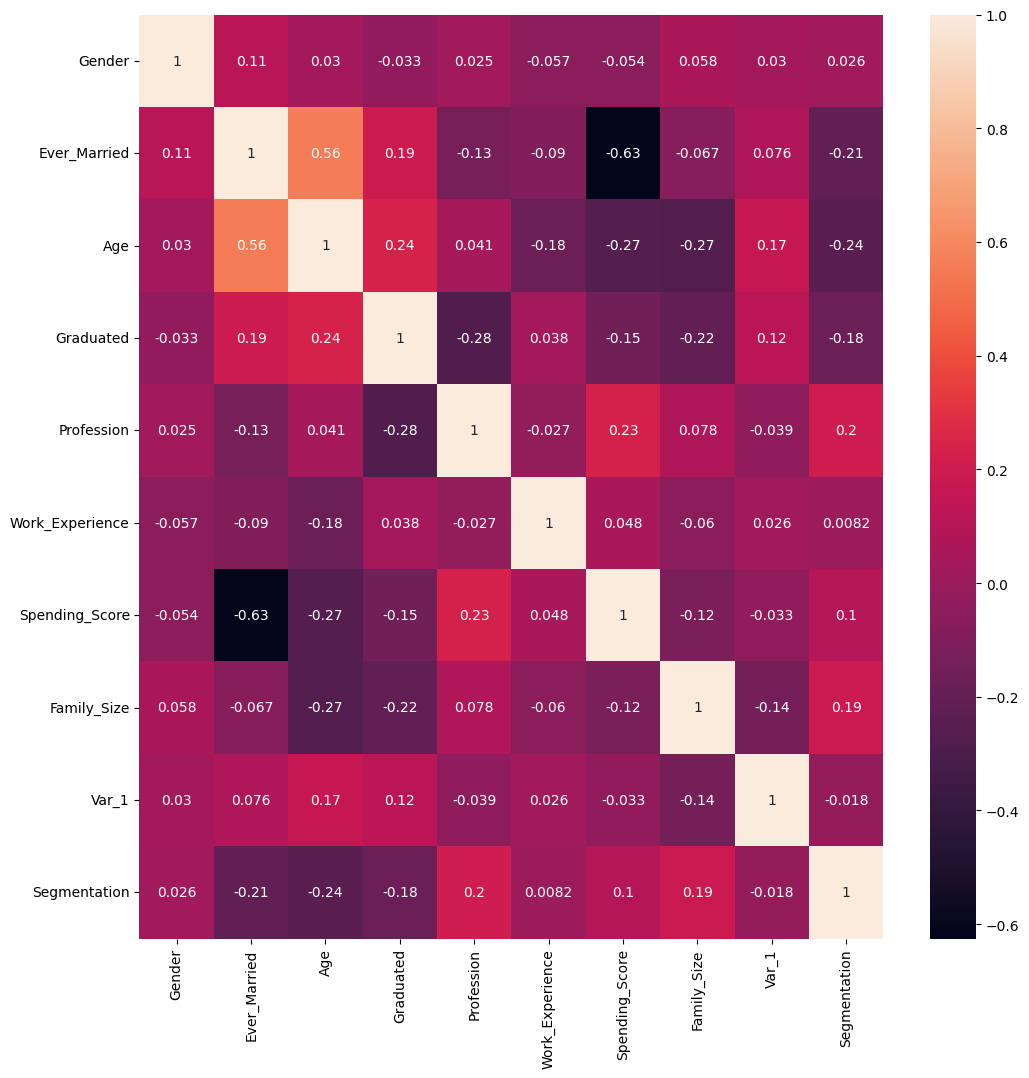

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.0,2,4.0,3,3
462643,0,1,38,1,2,1.0,0,3.0,3,0
466315,0,1,67,1,2,1.0,2,1.0,5,1
461735,1,1,67,1,7,0.0,1,2.0,5,1
462669,0,1,40,1,3,1.0,1,6.0,5,0


In [19]:
x = df.drop(columns=["Segmentation"], axis=1)
y = df["Segmentation"]

In [20]:
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
462809,1,0,22,0,5,1.0,2,4.0,3
462643,0,1,38,1,2,1.0,0,3.0,3
466315,0,1,67,1,2,1.0,2,1.0,5
461735,1,1,67,1,7,0.0,1,2.0,5
462669,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.0,2,7.0,0
464685,1,0,35,0,4,3.0,2,4.0,3
465406,0,0,33,1,5,1.0,2,1.0,5


In [21]:
y

ID
462809    3
462643    0
466315    1
461735    1
462669    0
         ..
464018    3
464685    3
465406    3
467299    1
461879    1
Name: Segmentation, Length: 8068, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [23]:
x_train.shape

(6454, 9)

In [24]:
y_train.shape

(6454,)

In [25]:
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(criterion='gini')
dtcr=DecisionTreeClassifier(criterion='entropy')

model=[mnb,knn,dtc,dtcr]

for i in model:
    i.fit(x_train,y_train)
    print("Score: ",i,i.score(x_train,y_train))
    mpred=i.predict(x_test)
    print('Accuracy_score: ',accuracy_score(y_test,mpred))
    print("Confusion_matrix: ",confusion_matrix(y_test,mpred))

    print('Classification Report: \n',classification_report(y_test,mpred))
    print('\n')


Score:  MultinomialNB() 0.4563061667183142
Accuracy_score:  0.46964064436183395
Confusion_matrix:  [[104  75  91 121]
 [ 61  77 175  56]
 [ 53  38 231  58]
 [ 56  43  29 346]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.27      0.31       391
           1       0.33      0.21      0.26       369
           2       0.44      0.61      0.51       380
           3       0.60      0.73      0.66       474

    accuracy                           0.47      1614
   macro avg       0.44      0.45      0.43      1614
weighted avg       0.45      0.47      0.45      1614



Score:  KNeighborsClassifier() 0.6258134490238612
Accuracy_score:  0.4479553903345725
Confusion_matrix:  [[168  94  55  74]
 [121 120  95  33]
 [ 76 100 165  39]
 [116  47  41 270]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.43      0.39       391
           1       0.33      0.33      0.33   

In [27]:
num_of_classes = df["Segmentation"].nunique()

In [28]:
import tensorflow as tf

# DNN model
# Set random seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(min_delta=0.001,
    patience=10,
    restore_best_weights=True,)

#  Build the model
model = tf.keras.Sequential([
  # tf.keras.layers.Dense(512, activation="relu"),
  # tf.keras.layers.Dropout(0.50),
  # tf.keras.layers.Dense(256, activation="relu"),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.Dropout(0.50),
  # tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(num_of_classes, activation="softmax")
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_history = model.fit(x_train, y_train,validation_data = (x_test, y_test),batch_size=32,
                          callbacks=[callback], epochs=500, verbose=1)
# Evaluate  model
model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
print("y pred before: ",y_pred[:5])
y_pred = y_pred.argmax(axis=1)
print("y pred after: ",y_pred[:5])

Epoch 1/500
202/202 [==============================] - 4s 9ms/step - loss: 1.3576 - accuracy: 0.3781 - val_loss: 1.2213 - val_accuracy: 0.4634
Epoch 2/500
202/202 [==============================] - 2s 8ms/step - loss: 1.2530 - accuracy: 0.4121 - val_loss: 1.1768 - val_accuracy: 0.4653
Epoch 3/500
202/202 [==============================] - 2s 8ms/step - loss: 1.2219 - accuracy: 0.4382 - val_loss: 1.1505 - val_accuracy: 0.4653
Epoch 4/500
202/202 [==============================] - 2s 8ms/step - loss: 1.1935 - accuracy: 0.4509 - val_loss: 1.1504 - val_accuracy: 0.4833
Epoch 5/500
202/202 [==============================] - 2s 8ms/step - loss: 1.1879 - accuracy: 0.4648 - val_loss: 1.1373 - val_accuracy: 0.4833
Epoch 6/500
202/202 [==============================] - 2s 8ms/step - loss: 1.1820 - accuracy: 0.4588 - val_loss: 1.1288 - val_accuracy: 0.4932
Epoch 7/500
202/202 [==============================] - 2s 11ms/step - loss: 1.1667 - accuracy: 0.4751 - val_loss: 1.1351 - val_accuracy: 0.490

In [29]:
model.evaluate(x_train, y_train)

202/202 [==============================] - 2s 8ms/step - loss: 1.0582 - accuracy: 0.5342


[1.0581755638122559, 0.5342423319816589]